In [1]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append(os.getenv('HW_FUZZING') + "/scripts")

In [2]:
ROOT_DIR = "/usr/local/google/home/ttrippel/Repos/hw-fuzzing/circuits/double_counter/data"
BYTE_STREAM_DIR = os.path.join(ROOT_DIR, "exp002a_aflgo_byte_stream")
ONE_BPL_DIR = os.path.join(ROOT_DIR, "exp003a_aflgo_1byte_per_line")
ONE_BPL_WCHECK_DIR = os.path.join(ROOT_DIR, "exp004a_aflgo_1byte_per_line_wformatcheck")

In [3]:
# Set VCD data paths
BSTREAM_10M_VCD = os.path.join(BYTE_STREAM_DIR, "out/aflgo_10m_1ttem_1/vcd/data.json")
BSTREAM_60M_VCD = os.path.join(BYTE_STREAM_DIR, "out/aflgo_60m_6ttem_1/vcd/data.json")
ONE_BPL_10M_VCD = os.path.join(ONE_BPL_DIR, "out/aflgo_10m_1ttem_1/vcd/data.json")
ONE_BPL_60M_VCD = os.path.join(ONE_BPL_DIR, "out/aflgo_60m_6ttem_1/vcd/data.json")
ONE_BPLWCHECK_10M_VCD = os.path.join(ONE_BPL_WCHECK_DIR, "out/aflgo_10m_1ttem_1/vcd/data.json")
ONE_BPLWCHECK_60M_VCD = os.path.join(ONE_BPL_WCHECK_DIR, "out/aflgo_60m_6ttem_1/vcd/data.json")

# Load VCD data
BSTREAM_10M_VCD_DF = pd.read_json(BSTREAM_10M_VCD)
BSTREAM_60M_VCD_DF = pd.read_json(BSTREAM_60M_VCD)
ONE_BPL_10M_VCD_DF = pd.read_json(ONE_BPL_10M_VCD)
ONE_BPL_60M_VCD_DF = pd.read_json(ONE_BPL_60M_VCD)
ONE_BPLWCHECK_10M_VCD = pd.read_json(ONE_BPLWCHECK_10M_VCD)
ONE_BPLWCHECK_60M_VCD = pd.read_json(ONE_BPLWCHECK_60M_VCD)
ONE_BPL_10M_VCD_DF

# Set VCD data paths
BSTREAM_10M_LOG = os.path.join(BYTE_STREAM_DIR, "logs/aflgo_10m_1ttem_1.err.log")
BSTREAM_60M_LOG = os.path.join(BYTE_STREAM_DIR, "logs/aflgo_60m_6ttem_1.err.log")
ONE_BPL_10M_LOG = os.path.join(ONE_BPL_DIR, "logs/aflgo_10m_1ttem_1.err.log")
ONE_BPL_60M_LOG = os.path.join(ONE_BPL_DIR, "logs/aflgo_60m_6ttem_1.err.log")
ONE_BPLWCHECK_10M_LOG = os.path.join(ONE_BPL_WCHECK_DIR, "logs/aflgo_10m_1ttem_1.err.log")
ONE_BPLWCHECK_60M_LOG = os.path.join(ONE_BPL_WCHECK_DIR, "logs/aflgo_60m_6ttem_1.err.log")

# Load log data
BSTREAM_10M_LOG_DF = pd.read_csv(BSTREAM_10M_LOG, header=0, skipinitialspace=True)
BSTREAM_60M_LOG_DF = pd.read_csv(BSTREAM_60M_LOG, header=0, skipinitialspace=True)
ONE_BPL_10M_LOG_DF = pd.read_csv(ONE_BPL_10M_LOG, header=0, skipinitialspace=True)
ONE_BPL_60M_LOG_DF = pd.read_csv(ONE_BPL_60M_LOG, header=0, skipinitialspace=True)
ONE_BPLWCHECK_10M_LOG_DF = pd.read_csv(ONE_BPLWCHECK_10M_LOG, header=0, skipinitialspace=True)
ONE_BPLWCHECK_60M_LOG_DF = pd.read_csv(ONE_BPLWCHECK_60M_LOG, header=0, skipinitialspace=True)

Saving plot to: /usr/local/google/home/ttrippel/Repos/hw-fuzzing/plots/exp003_double_counter_input_format.pdf


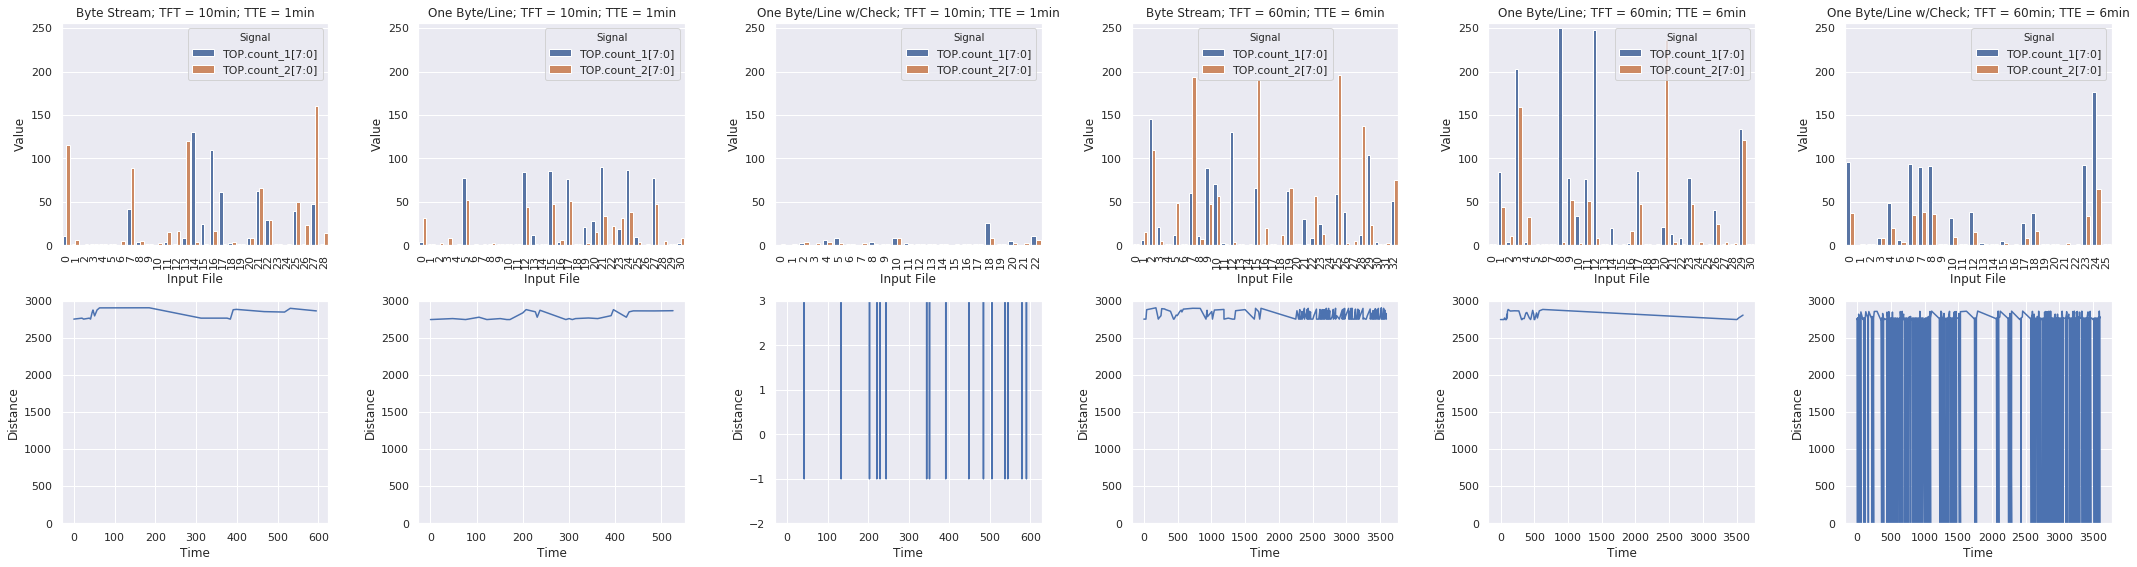

In [6]:
# Plot data
sns.set()
fig, axes = plt.subplots(2, 6, figsize=(30, 8));

# Plot register counts
sns.barplot(x="Input File", y="Value", hue="Signal", data=BSTREAM_10M_VCD_DF, ax=axes[0][0])
sns.barplot(x="Input File", y="Value", hue="Signal", data=BSTREAM_60M_VCD_DF, ax=axes[0][3])
sns.barplot(x="Input File", y="Value", hue="Signal", data=ONE_BPL_10M_VCD_DF, ax=axes[0][1])
sns.barplot(x="Input File", y="Value", hue="Signal", data=ONE_BPL_60M_VCD_DF, ax=axes[0][4])
sns.barplot(x="Input File", y="Value", hue="Signal", data=ONE_BPLWCHECK_10M_VCD, ax=axes[0][2])
sns.barplot(x="Input File", y="Value", hue="Signal", data=ONE_BPLWCHECK_60M_VCD, ax=axes[0][5])

# Plot distances
sns.lineplot(x=BSTREAM_10M_LOG_DF["Time"], y=BSTREAM_10M_LOG_DF["Distance"], ax=axes[1][0], estimator=None)
sns.lineplot(x=BSTREAM_60M_LOG_DF["Time"], y=BSTREAM_60M_LOG_DF["Distance"], ax=axes[1][3], estimator=None)
sns.lineplot(x=ONE_BPL_10M_LOG_DF["Time"], y=ONE_BPL_10M_LOG_DF["Distance"], ax=axes[1][1], estimator=None)
sns.lineplot(x=ONE_BPL_60M_LOG_DF["Time"], y=ONE_BPL_60M_LOG_DF["Distance"], ax=axes[1][4], estimator=None)
sns.lineplot(x=ONE_BPLWCHECK_10M_LOG_DF["Time"], y=ONE_BPLWCHECK_10M_LOG_DF["Distance"], ax=axes[1][2], estimator=None)
sns.lineplot(x=ONE_BPLWCHECK_60M_LOG_DF["Time"], y=ONE_BPLWCHECK_60M_LOG_DF["Distance"], ax=axes[1][5], estimator=None)

# Format plots
for ax in axes[0]:
  ax.set_ylim([0, 256])
  plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
for ax in axes[1]:
  ax.set_ylim([0, 3000])
axes[1][2].set_ylim([-2, 3])
axes[0][0].set_title("Byte Stream; TFT = 10min; TTE = 1min")
axes[0][3].set_title("Byte Stream; TFT = 60min; TTE = 6min")
axes[0][1].set_title("One Byte/Line; TFT = 10min; TTE = 1min")
axes[0][4].set_title("One Byte/Line; TFT = 60min; TTE = 6min")
axes[0][2].set_title("One Byte/Line w/Check; TFT = 10min; TTE = 1min")
axes[0][5].set_title("One Byte/Line w/Check; TFT = 60min; TTE = 6min")

# Adjust layout of subplots to fit
plt.tight_layout();

# Save Plot as a PDF
plot_filename = "/usr/local/google/home/ttrippel/Repos/hw-fuzzing/plots/exp003_double_counter_input_format.pdf"
print("Saving plot to:", plot_filename)
plt.savefig(plot_filename, format='pdf')